–û–ø–∏—Å–∞–Ω–∏–µ –∑–∞–¥–∞—á–∏
–¶–µ–ª—å: –ü–æ—Å—Ç—Ä–æ–∏—Ç—å –º–æ–¥–µ–ª—å, –∫–æ—Ç–æ—Ä–∞—è –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –≤—ã–∂–∏–≤–∞–Ω–∏—è –ø–∞—Å—Å–∞–∂–∏—Ä–æ–≤, –∏—Å–ø–æ–ª—å–∑—É—è –∏—Ö –¥–∞–Ω–Ω—ã–µ. –¢–∏–ø –∑–∞–¥–∞—á–∏: –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è (–±–∏–Ω–∞—Ä–Ω–∞—è) ‚Äî –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –≤—ã–∂–∏–≤–∞–Ω–∏—è (Survived, 1 –∏–ª–∏ 0). –í—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ: –•–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –ø–∞—Å—Å–∞–∂–∏—Ä–æ–≤, —Ç–∞–∫–∏–µ –∫–∞–∫ –≤–æ–∑—Ä–∞—Å—Ç, –ø–æ–ª, –∫–ª–∞—Å—Å –±–∏–ª–µ—Ç–∞, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–æ–¥—Å—Ç–≤–µ–Ω–Ω–∏–∫–æ–≤ –Ω–∞ –±–æ—Ä—Ç—É –∏ —Ç.–¥.

In [22]:
# Titanic Survival Prediction

### Step 0. Problem Description
###Objective**: Predict the survival of Titanic passengers using data on their characteristics.
###type of task**: Binary classification - predicting `Survived` (1 = yes, 0 = no).



### Step 1. Loading the Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

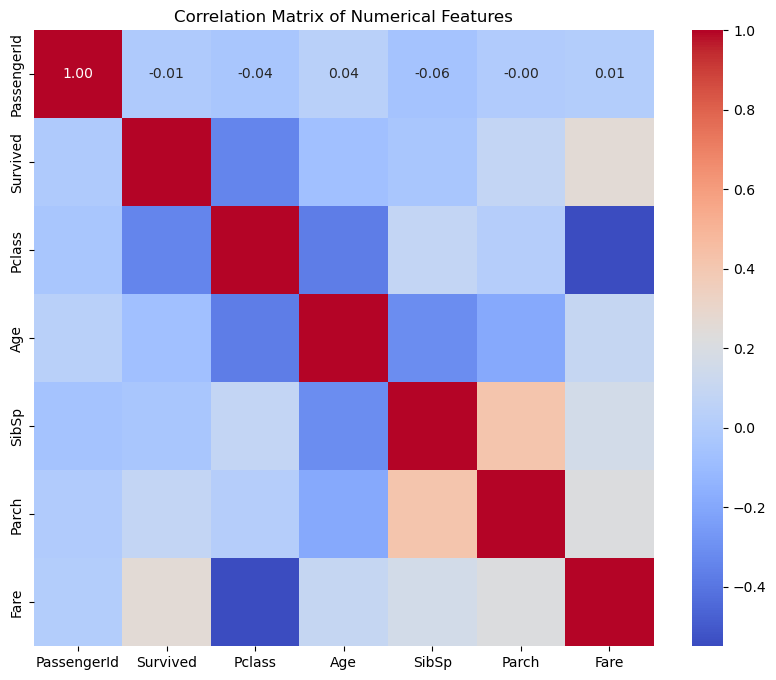

In [23]:
numeric_features = train.select_dtypes(include=[float, int])

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

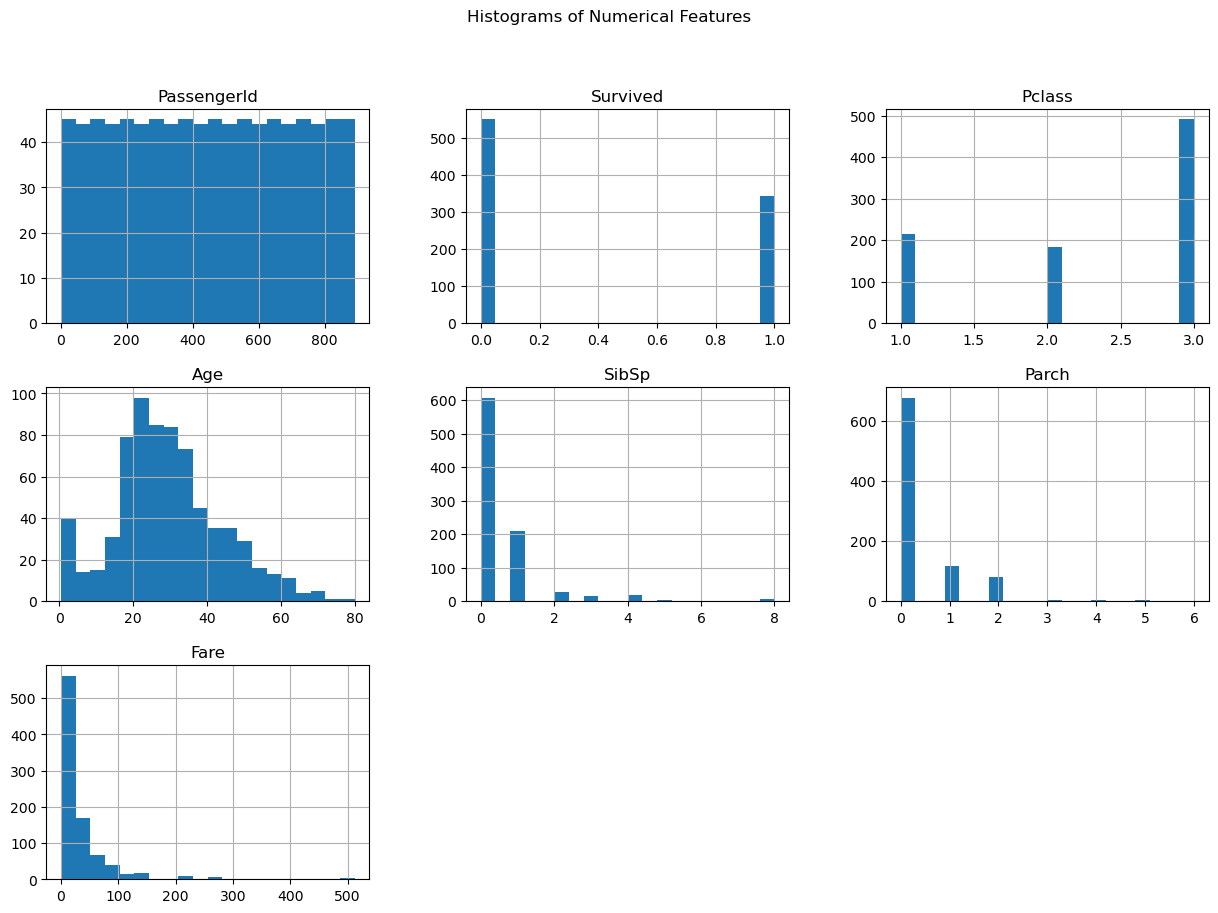

In [24]:


# –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
train.hist(bins=20, figsize=(15,10))
plt.suptitle("Histograms of Numerical Features")
plt.show()


In [25]:
# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –æ—Å–Ω–æ–≤–Ω—ã—Ö —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫ –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
statistics = train.describe()
print(statistics)


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


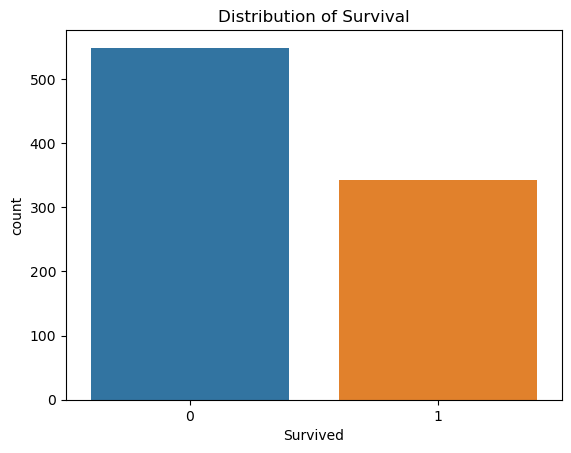

In [26]:
sns.countplot(x='Survived', data=train)
plt.title('Distribution of Survival')
plt.show()


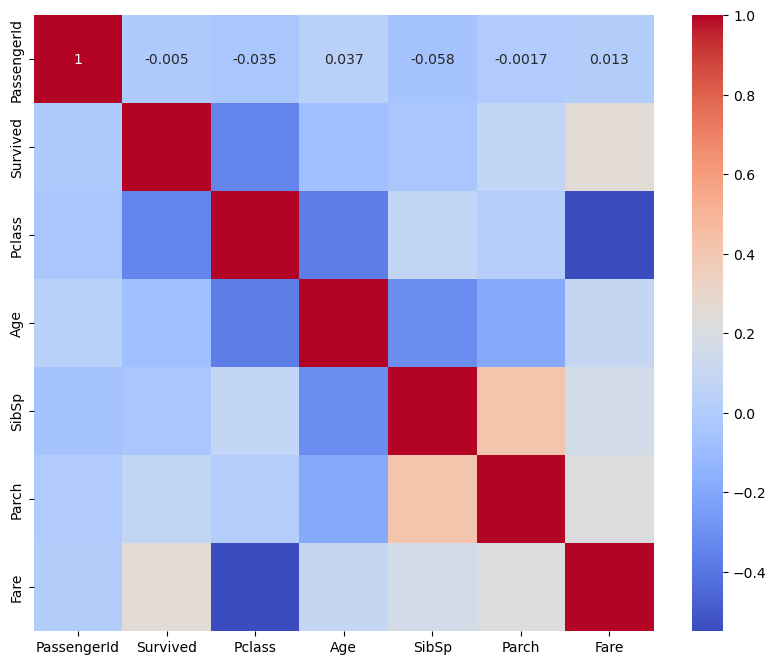

In [27]:
# Step 2. Data Analysis and Basic Statistics
# Select only numerical columns for the correlation matrix
numeric_features = train.select_dtypes(include=[float, int])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm')
plt.show()


AttributeError: 'numpy.int64' object has no attribute 'startswith'

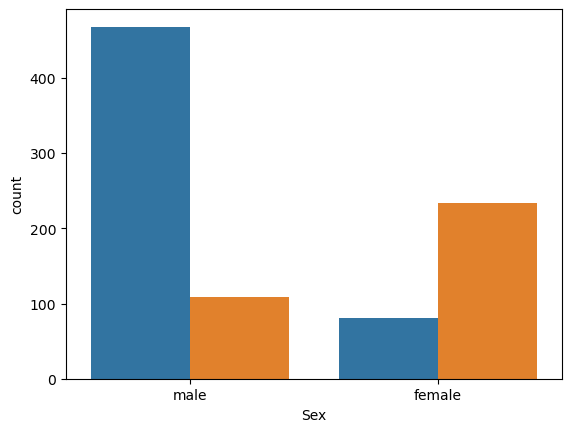

In [29]:
# –í–∑–∞–∏–º–æ—Å–≤—è–∑—å –ø–æ–ª–∞ —Å –≤—ã–∂–∏–≤–∞–µ–º–æ—Å—Ç—å—é
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Survival Rate by Gender')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

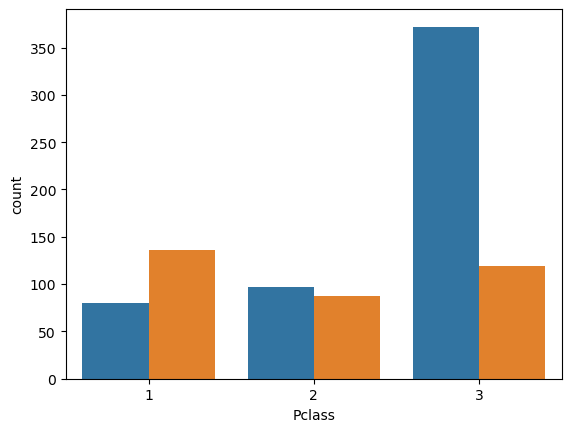

In [30]:
# –í–∑–∞–∏–º–æ—Å–≤—è–∑—å –∫–ª–∞—Å—Å–∞ —Å –≤—ã–∂–∏–≤–∞–µ–º–æ—Å—Ç—å—é
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival Rate by Passenger Class')
plt.show()


–ü–µ—Ä–≤–∏—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö –ø–æ–∫–∞–∑–∞–ª, —á—Ç–æ –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (—Ç–∞–∫–∏–µ –∫–∞–∫ Pclass, Sex, Age, Fare –∏ Embarked) –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–æ –º–æ–≥—É—Ç –±—ã—Ç—å –ø–æ–ª–µ–∑–Ω—ã –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è. –ù–∞–ø—Ä–∏–º–µ—Ä, –∂–µ–Ω—â–∏–Ω—ã –∏ –ø–∞—Å—Å–∞–∂–∏—Ä—ã –ø–µ—Ä–≤–æ–≥–æ –∫–ª–∞—Å—Å–∞ –∏–º–µ–ª–∏ –≥–æ—Ä–∞–∑–¥–æ –±–æ–ª—å—à–µ —à–∞–Ω—Å–æ–≤ –≤—ã–∂–∏—Ç—å. –í —Ç–æ –∂–µ –≤—Ä–µ–º—è, –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫–∞–∫ Name –∏ Ticket, –æ–∫–∞–∑–∞–ª–∏—Å—å –º–µ–Ω–µ–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–º–∏ –∏ –Ω–µ –±—ã–ª–∏ –≤–∫–ª—é—á–µ–Ω—ã –≤ –æ–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω—ã–π –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö.

–î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ø–æ–º–æ–≥–ª–æ –ø–æ–Ω—è—Ç—å –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏ –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π. –ü–æ–∑–∏—Ç–∏–≤–Ω—ã–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, Pclass –∏ Fare) –ø–æ–¥—Ç–≤–µ—Ä–¥–∏–ª–∏ –∏–Ω—Ç—É–∏—Ç–∏–≤–Ω–æ–µ –ø–æ–Ω–∏–º–∞–Ω–∏–µ —Ç–æ–≥–æ, —á—Ç–æ –∫–ª–∞—Å—Å –±–∏–ª–µ—Ç–∞ –º–æ–≥ —Å–∏–ª—å–Ω–æ –≤–ª–∏—è—Ç—å –Ω–∞ —à–∞–Ω—Å—ã –Ω–∞ —Å–ø–∞—Å–µ–Ω–∏–µ.

In [31]:
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)


In [32]:
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)

In [33]:


scaler = StandardScaler()
train[['Age', 'Fare']] = scaler.fit_transform(train[['Age', 'Fare']])


In [34]:
from sklearn.model_selection import train_test_split

X = train.drop('Survived', axis=1)
y = train['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Step 6. Splitting the Data
# Remove irrelevant or non-numeric columns (e.g., Name, Ticket, Cabin) from X
X = train.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train['Survived']

from sklearn.model_selection import train_test_split

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

knn = KNeighborsClassifier()
scores = []
for k in range(1, 20):
    knn.n_neighbors = k
    score = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

best_k = np.argmax(scores) + 1
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=2)

In [37]:
train_score = knn.score(X_train, y_train)
val_score = knn.score(X_val, y_val)
print(f"Training Score: {train_score}, Validation Score: {val_score}")


Training Score: 0.7640449438202247, Validation Score: 0.5921787709497207


In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_val_score = rf.score(X_val, y_val)
print(f"Random Forest Validation Score: {rf_val_score}")


Random Forest Validation Score: 0.8212290502793296


–ü–µ—Ä–≤–∏—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö –ø–æ–∫–∞–∑–∞–ª, —á—Ç–æ –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (—Ç–∞–∫–∏–µ –∫–∞–∫ Pclass, Sex, Age, Fare –∏ Embarked) –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–æ –º–æ–≥—É—Ç –±—ã—Ç—å –ø–æ–ª–µ–∑–Ω—ã –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è. –ù–∞–ø—Ä–∏–º–µ—Ä, –∂–µ–Ω—â–∏–Ω—ã –∏ –ø–∞—Å—Å–∞–∂–∏—Ä—ã –ø–µ—Ä–≤–æ–≥–æ –∫–ª–∞—Å—Å–∞ –∏–º–µ–ª–∏ –≥–æ—Ä–∞–∑–¥–æ –±–æ–ª—å—à–µ —à–∞–Ω—Å–æ–≤ –≤—ã–∂–∏—Ç—å. –í —Ç–æ –∂–µ –≤—Ä–µ–º—è, –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫–∞–∫ Name –∏ Ticket, –æ–∫–∞–∑–∞–ª–∏—Å—å –º–µ–Ω–µ–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–º–∏ –∏ –Ω–µ –±—ã–ª–∏ –≤–∫–ª—é—á–µ–Ω—ã –≤ –æ–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω—ã–π –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö.

–î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ø–æ–º–æ–≥–ª–æ –ø–æ–Ω—è—Ç—å –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏ –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π. –ü–æ–∑–∏—Ç–∏–≤–Ω—ã–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, Pclass –∏ Fare) –ø–æ–¥—Ç–≤–µ—Ä–¥–∏–ª–∏ –∏–Ω—Ç—É–∏—Ç–∏–≤–Ω–æ–µ –ø–æ–Ω–∏–º–∞–Ω–∏–µ —Ç–æ–≥–æ, —á—Ç–æ –∫–ª–∞—Å—Å –±–∏–ª–µ—Ç–∞ –º–æ–≥ —Å–∏–ª—å–Ω–æ –≤–ª–∏—è—Ç—å –Ω–∞ —à–∞–Ω—Å—ã –Ω–∞ —Å–ø–∞—Å–µ–Ω–∏–µ.

–û—Å–Ω–æ–≤–Ω—ã–º –∞–ª–≥–æ—Ä–∏—Ç–º–æ–º –±—ã–ª –≤—ã–±—Ä–∞–Ω –º–µ—Ç–æ–¥ K –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π (KNN), –ø–æ—Å–∫–æ–ª—å–∫—É –µ–≥–æ –ø—Ä–æ—Å—Ç–æ –Ω–∞—Å—Ç—Ä–æ–∏—Ç—å –∏ –æ–Ω —Ö–æ—Ä–æ—à–æ —Ä–∞–±–æ—Ç–∞–µ—Ç –Ω–∞ –Ω–µ–±–æ–ª—å—à–∏—Ö –Ω–∞–±–æ—Ä–∞—Ö –¥–∞–Ω–Ω—ã—Ö. –û–¥–Ω–∞–∫–æ –µ–≥–æ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ–º —è–≤–ª—è–µ—Ç—Å—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –æ—Ç –≤—ã–±–æ—Ä–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞ ùëò, –∫–æ—Ç–æ—Ä—ã–π –º—ã –ø–æ–¥–±–∏—Ä–∞–ª–∏ —Å –ø–æ–º–æ—â—å—é –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏, —á—Ç–æ–±—ã –º–∏–Ω–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ –∏ —É–ª—É—á—à–∏—Ç—å –æ–±–æ–±—â–∞—é—â—É—é —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª

–ö—Ä–æ–º–µ —Ç–æ–≥–æ, –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –±—ã–ª–∏ –ø—Ä–∏–º–µ–Ω–µ–Ω—ã –º–æ–¥–µ–ª–∏ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –∏ —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ (Random Forest). –°–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å –ø–æ–∫–∞–∑–∞–ª –ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤ —á–∞—Å—Ç–∏ —Ç–æ—á–Ω–æ—Å—Ç–∏ –∏ —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç–∏ –∫ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—é –±–ª–∞–≥–æ–¥–∞—Ä—è —É—Å—Ä–µ–¥–Ω–µ–Ω–∏—é –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –º–Ω–æ–∂–µ—Å—Ç–≤–∞ –¥–µ—Ä–µ–≤—å–µ–≤.

–ò—Ç–æ–≥–æ–≤—ã–π –∞–Ω–∞–ª–∏–∑ –ø–æ–∫–∞–∑–∞–ª, —á—Ç–æ —Å–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å –æ–∫–∞–∑–∞–ª—Å—è –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–¥—Ö–æ–¥—è—â–µ–π –º–æ–¥–µ–ª—å—é –¥–ª—è –¥–∞–Ω–Ω—ã—Ö Titanic, –±–ª–∞–≥–æ–¥–∞—Ä—è —Å–≤–æ–µ–π —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç–∏, —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏ –Ω–∞—Ö–æ–¥–∏—Ç—å –Ω–µ–ª–∏–Ω–µ–π–Ω—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –∏ —Å–ø—Ä–∞–≤–ª—è—Ç—å—Å—è —Å —Ä–∞–∑–Ω—ã–º–∏ —Ç–∏–ø–∞–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –ú–µ—Ç–æ–¥ KNN —Ç–∞–∫–∂–µ –ø–æ–∫–∞–∑–∞–ª –ø—Ä–∏–µ–º–ª–µ–º—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∏ –º–æ–∂–µ—Ç –±—ã—Ç—å –ø–æ–ª–µ–∑–µ–Ω –≤ —Å–∏—Ç—É–∞—Ü–∏—è—Ö, –≥–¥–µ —Ç—Ä–µ–±—É–µ—Ç—Å—è –±—ã—Å—Ç—Ä–∞—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è –∏ —Ä–∞–±–æ—Ç–∞ —Å –Ω–µ–±–æ–ª—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –¥–∞–Ω–Ω—ã—Ö.

In [39]:
# Re-importing necessary libraries after environment reset
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Reload the Titanic dataset
file_path = 'train.csv'
titanic_df = pd.read_csv(file_path)

# Step 1: Data preprocessing

# Dropping unnecessary columns (PassengerId, Name, Ticket, Cabin) and handling missing values
data = titanic_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
data["Age"].fillna(data["Age"].median(), inplace=True)  # Filling missing Age with median
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)  # Filling missing Embarked with mode

# Encoding categorical variables
le = LabelEncoder()
data["Sex"] = le.fit_transform(data["Sex"])  # Encoding 'Sex'
data["Embarked"] = le.fit_transform(data["Embarked"])  # Encoding 'Embarked'

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=["Survived"]))  # Excluding target variable

# True labels for comparison
y_true = data["Survived"]

# Step 2: Clustering
# KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Tuned parameters
dbscan_labels = dbscan.fit_predict(X_scaled)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=2)
agg_labels = agg.fit_predict(X_scaled)

# Step 3: Evaluation
# Adjusted Rand Index (ARI)
ari_kmeans = adjusted_rand_score(y_true, kmeans_labels)
ari_dbscan = adjusted_rand_score(y_true, dbscan_labels)
ari_agg = adjusted_rand_score(y_true, agg_labels)

# Silhouette Score (for cluster structure quality, -1 to 1)
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
# Silhouette score for DBSCAN might fail if clusters are poorly defined; handle it gracefully
silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else None
silhouette_agg = silhouette_score(X_scaled, agg_labels)

ari_kmeans, ari_dbscan, ari_agg, silhouette_kmeans, silhouette_dbscan, silhouette_agg


C:\Users\mixa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mixa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


(0.11407144142801443,
 0.2915266022080733,
 0.056444108517700986,
 0.27655838934481436,
 0.2604056162113056,
 0.32412705650220125)

# –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –∏ –∞–Ω–∞–ª–∏–∑

## –ú–µ—Ç–æ–¥—ã –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏
–î–ª—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –±—ã–ª–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω—ã —Ç—Ä–∏ –º–µ—Ç–æ–¥–∞:
1. **KMeans** ‚Äî –∞–ª–≥–æ—Ä–∏—Ç–º, –∫–æ—Ç–æ—Ä—ã–π —Ä–∞—Å–ø—Ä–µ–¥–µ–ª—è–µ—Ç –¥–∞–Ω–Ω—ã–µ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º –Ω–∞ –æ—Å–Ω–æ–≤–µ –º–∏–Ω–∏–º–∏–∑–∞—Ü–∏–∏ –≤–Ω—É—Ç—Ä–∏–∫–ª–∞—Å—Ç–µ—Ä–Ω–æ–π —Å—É–º–º—ã –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π.
2. **DBSCAN** ‚Äî –∞–ª–≥–æ—Ä–∏—Ç–º, –æ—Å–Ω–æ–≤–∞–Ω–Ω—ã–π –Ω–∞ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –¥–∞–Ω–Ω—ã—Ö, –∫–æ—Ç–æ—Ä—ã–π –≤—ã–¥–µ–ª—è–µ—Ç –∫–ª–∞—Å—Ç–µ—Ä—ã –ø–æ –ø–ª–æ—Ç–Ω—ã–º –æ–±–ª–∞—Å—Ç—è–º –¥–∞–Ω–Ω—ã—Ö –∏ –≤—ã—è–≤–ª—è–µ—Ç –≤—ã–±—Ä–æ—Å—ã.
3. **Agglomerative Clustering** ‚Äî –∏–µ—Ä–∞—Ä—Ö–∏—á–µ—Å–∫–∏–π –º–µ—Ç–æ–¥, –æ–±—ä–µ–¥–∏–Ω—è—é—â–∏–π —Ç–æ—á–∫–∏ –≤ –∫–ª–∞—Å—Ç–µ—Ä—ã –ø–æ –º–µ—Ä–µ —É–≤–µ–ª–∏—á–µ–Ω–∏—è –º–∞—Å—à—Ç–∞–±–∞.

## –ú–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞
–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º Adjusted Rand Index (ARI) –∏ Silhouette Score:

| –ú–µ—Ç—Ä–∏–∫–∞                | KMeans   | DBSCAN  | Agglomerative Clustering |
|------------------------|----------|---------|--------------------------|
| **Adjusted Rand Index**| 0.114    | 0.292   | 0.056                    |
| **Silhouette Score**   | 0.277    | 0.260   | 0.324                    |

### –ü–æ—è—Å–Ω–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫:
1. **Adjusted Rand Index (ARI)**: 
   - –ò–∑–º–µ—Ä—è–µ—Ç —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω–æ—Å—Ç—å –≤—ã–¥–µ–ª–µ–Ω–Ω—ã—Ö –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ —Å –∏—Å—Ç–∏–Ω–Ω—ã–º–∏ –º–µ—Ç–∫–∞–º–∏. –ó–Ω–∞—á–µ–Ω–∏–µ –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ –æ—Ç -1 –¥–æ 1, –≥–¥–µ 1 –æ–∑–Ω–∞—á–∞–µ—Ç –ø–æ–ª–Ω–æ–µ —Å–æ–≤–ø–∞–¥–µ–Ω–∏–µ.
   - –í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –≤—Å–µ –∑–Ω–∞—á–µ–Ω–∏—è ARI –Ω–∏–∑–∫–∏–µ, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Å–ª–∞–±–æ–π —Å–≤—è–∑–∏ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ —Å –∏—Å—Ç–∏–Ω–Ω—ã–º–∏ –º–µ—Ç–∫–∞–º–∏.

2. **Silhouette Score**: 
   - –û—Ü–µ–Ω–∏–≤–∞–µ—Ç –∫–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ (–∫–æ–º–ø–∞–∫—Ç–Ω–æ—Å—Ç—å –∏ —Ä–∞–∑–¥–µ–ª–∏–º–æ—Å—Ç—å). –ó–Ω–∞—á–µ–Ω–∏—è –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ –æ—Ç -1 –¥–æ 1, –≥–¥–µ 1 –æ–∑–Ω–∞—á–∞–µ—Ç —á—ë—Ç–∫–∏–µ –∏ –∏–∑–æ–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∫–ª–∞—Å—Ç–µ—Ä—ã.
   - Agglomerative Clustering –ø–æ–∫–∞–∑–∞–ª –ª—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ Silhouette Score, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –±–æ–ª–µ–µ —á—ë—Ç–∫–∏–µ –∫–ª–∞—Å—Ç–µ—Ä—ã, —Ö–æ—Ç—è —ç—Ç–æ –Ω–µ —Å–≤—è–∑–∞–Ω–æ –Ω–∞–ø—Ä—è–º—É—é —Å –∏—Å—Ç–∏–Ω–Ω—ã–º–∏ –º–µ—Ç–∫–∞–º–∏.

## –í—ã–≤–æ–¥—ã
### 1. –†–∞–∑–ª–∏—á–∏—è –≤ –º–µ—Ç–æ–¥–∞—Ö
- **KMeans**:
  - –ü–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è –¥–∞–Ω–Ω—ã—Ö —Å —á—ë—Ç–∫–æ —Ä–∞–∑–¥–µ–ª—ë–Ω–Ω—ã–º–∏ –∫–ª–∞—Å—Ç–µ—Ä–∞–º–∏ –∫—Ä—É–≥–ª–æ–π —Ñ–æ—Ä–º—ã.
  - –í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∏–∑–∫–∏–π ARI –∏ —Å—Ä–µ–¥–Ω–∏–π Silhouette Score, —Ç–∞–∫ –∫–∞–∫ –¥–∞–Ω–Ω—ã–µ –Ω–µ –∏–º–µ—é—Ç —Ç–∞–∫–æ–π —á—ë—Ç–∫–æ–π —Å—Ç—Ä—É–∫—Ç—É—Ä—ã.

- **DBSCAN**:
  - –í—ã—è–≤–ª—è–µ—Ç –∫–ª–∞—Å—Ç–µ—Ä—ã –Ω–∞ –æ—Å–Ω–æ–≤–µ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –∏ –º–æ–∂–µ—Ç –æ–ø—Ä–µ–¥–µ–ª—è—Ç—å –≤—ã–±—Ä–æ—Å—ã.
  - –ü–æ–∫–∞–∑–∞–ª –ª—É—á—à–∏–π ARI, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ –±–æ–ª–µ–µ —Å–∏–ª—å–Ω–æ–π —Å–≤—è–∑–∏ —Å –∏—Å—Ç–∏–Ω–Ω—ã–º–∏ –º–µ—Ç–∫–∞–º–∏, –Ω–æ –∫–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –ø–æ Silhouette Score –Ω–µ–º–Ω–æ–≥–æ —É—Å—Ç—É–ø–∞–µ—Ç.

- **Agglomerative Clustering**:
  - –°–æ–∑–¥–∞—ë—Ç –∫–ª–∞—Å—Ç–µ—Ä—ã –Ω–∞ –æ—Å–Ω–æ–≤–µ –∏–µ—Ä–∞—Ä—Ö–∏—á–µ—Å–∫–æ–π —Å—Ç—Ä—É–∫—Ç—É—Ä—ã.
  - –ü–æ–∫–∞–∑–∞–ª —Å–∞–º—ã–π –≤—ã—Å–æ–∫–∏–π Silhouette Score, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —á—ë—Ç–∫—É—é –∫–ª–∞—Å—Ç–µ—Ä–Ω—É—é —Å—Ç—Ä—É–∫—Ç—É—Ä—É, –Ω–æ –Ω–∏–∑–∫–∏–π ARI, –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É—è —Å–ª–∞–±—É—é —Å–≤—è–∑—å —Å –∏—Å—Ç–∏–Ω–Ω—ã–º–∏ –º–µ—Ç–∫–∞–º–∏.

### 2. –ö–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏
- –ù–∏–∑–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è ARI –¥–ª—è –≤—Å–µ—Ö –º–µ—Ç–æ–¥–æ–≤ —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ —Å–ª–æ–∂–Ω–æ—Å—Ç—å –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è –∏—Å—Ç–∏–Ω–Ω—ã—Ö –º–µ—Ç–æ–∫ –±–µ–∑ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (`Survived`).
- –í—Å–µ –º–µ—Ç–æ–¥—ã –≤—ã–¥–µ–ª–∏–ª–∏ –∫–ª–∞—Å—Ç–µ—Ä—ã, –æ–¥–Ω–∞–∫–æ –∏—Ö —Å—Ç—Ä—É–∫—Ç—É—Ä–∞ –Ω–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –∏—Å—Ç–∏–Ω–Ω–æ–π —Ä–∞–∑–º–µ—Ç–∫–µ –¥–∞–Ω–Ω—ã—Ö.

### 3. –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏
- –î–ª—è –∑–∞–¥–∞—á–∏ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ —ç—Ç–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞ –º–µ—Ç–æ–¥—ã KMeans –∏ DBSCAN –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É—é—Ç —Å—Ö–æ–∂–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã. DBSCAN –º–æ–∂–Ω–æ —É–ª—É—á—à–∏—Ç—å –∑–∞ —Å—á—ë—Ç –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ `eps` –∏ `min_samples`.
- Agglomerative Clustering –ª—É—á—à–µ —Å—Ç—Ä—É–∫—Ç—É—Ä–∏—Ä–æ–≤–∞–ª –¥–∞–Ω–Ω—ã–µ, –Ω–æ –µ–≥–æ –Ω–∏–∑–∫–∏–π ARI –æ–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ—Ç –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –¥–ª—è –∑–∞–¥–∞—á, —Ç—Ä–µ–±—É—é—â–∏—Ö –≤—ã—Å–æ–∫–æ–π —Ç–æ—á–Ω–æ—Å—Ç–∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è –º–µ—Ç–æ–∫.
- –î–∞–ª—å–Ω–µ–π—à–∏–π –∞–Ω–∞–ª–∏–∑ –º–æ–∂–Ω–æ –ø—Ä–æ–≤–µ—Å—Ç–∏ —Å —É–º–µ–Ω—å—à–µ–Ω–∏–µ–º —á–∏—Å–ª–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –≤—ã–±–æ—Ä–æ–º –¥—Ä—É–≥–∏—Ö –º–µ—Ç—Ä–∏–∫ –∏–ª–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏.

